In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris

# [Problem 1] Select features and categories for practice

* virgicolor and virginica
* sepal_length and petal_length

In [77]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([X, y], axis=1)

df_selected = df.query("Species == [1, 2]").loc[:, ["sepal_length", "petal_length", "Species"]]
display(df_selected.head())
df_selected.describe()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


,sepal_length,petal_length,Species
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


# [Problem 2] Data analysis

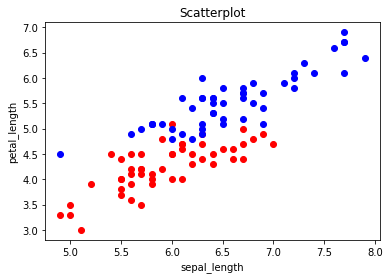

In [78]:
x_0 = df_selected[df_selected.Species == 1].iloc[:, 0]  # sepal with species 1
y_0 = df_selected[df_selected.Species == 1].iloc[:, 1]  # petal with species 1

x_1 = df_selected[df_selected.Species == 2].iloc[:, 0]  # sepal with species 2
y_1 = df_selected[df_selected.Species == 2].iloc[:, 1]  # petal with species 2

fig = plt.figure( figsize=(6,4))
plt.title('Scatterplot')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.scatter(x_0, y_0, c='red') #species 1
plt.scatter(x_1, y_1, c='blue') #species 2
plt.show()

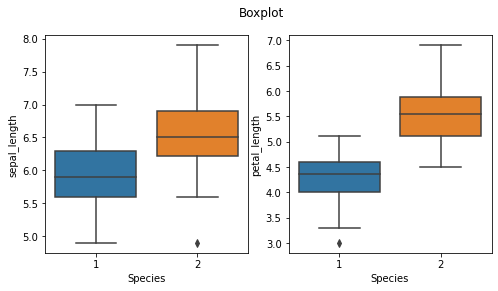

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

fig.suptitle('Boxplot')
sns.boxplot(x='Species', y='sepal_length', data=df_selected, ax=axes[0])
sns.boxplot(x='Species', y='petal_length', data=df_selected, ax=axes[1])
plt.show()

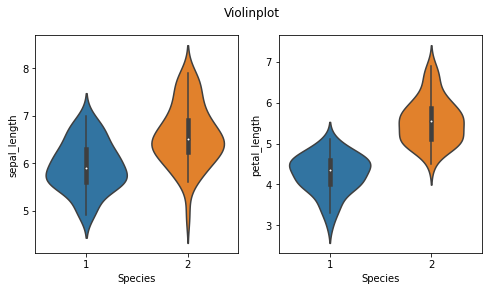

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

fig.suptitle('Violinplot')
sns.violinplot(x='Species', y='sepal_length', data=df_selected, ax=axes[0])
sns.violinplot(x='Species', y='petal_length', data=df_selected, ax=axes[1])
plt.show()

# [Problem 3] Division of preprocessing/training data and verification data

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1].values,
                                    df_selected.iloc[:, -1].values,train_size=0.75, random_state=42)

print(f'Traning set / Species: {X_train.shape},{y_train.shape}, Test set/species : {X_test.shape},{y_test.shape}')

Traning set / Species: (75, 2),(75,), Test set/species : (25, 2),(25,)


# [Problem 4] Pretreatment/Standardization

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

# [Problem 5] Learning and estimation

In [83]:
from sklearn.neighbors import KNeighborsClassifier

#init the class
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_5 = KNeighborsClassifier(n_neighbors=5)
# learn
neigh_1.fit(X_train_transformed, y_train)
neigh_3.fit(X_train_transformed, y_train)
neigh_5.fit(X_train_transformed, y_train)
# predict
y_pred_neigh_1 = neigh_1.predict(X_test_transformed)
y_pred_neigh_3 = neigh_3.predict(X_test_transformed)
y_pred_neigh_5 = neigh_5.predict(X_test_transformed)

In [84]:
print('1-nn estimates the validation data :{}'.format(y_pred_neigh_1))
print('3-nn estimates the validation data:{}'.format(y_pred_neigh_3))
print('5-nn estimates the validation data:{}'.format(y_pred_neigh_5))

1-nn estimates the validation data :[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
3-nn estimates the validation data:[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
5-nn estimates the validation data:[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


# [Problem 6] Evaluation

In [85]:
from sklearn import metrics 

def evaluate(y_true, y_pred):
    #Function to call many k of knn
    accuracy = metrics.accuracy_score(y_test, y_pred)    
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, confusion

* Calculate 4 types of indicators using scikit-learn

In [86]:
print('\t1-nn')
print('accuracy : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}'.format(*evaluate(y_test, y_pred_neigh_1)))
print('===================')
print('\t3-nn')
print('accuracy : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}'.format(*evaluate(y_test, y_pred_neigh_3)))
print('===================')
print('\t5-nn')
print('accuracy : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}'.format(*evaluate(y_test, y_pred_neigh_5)))

	1-nn
accuracy : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
	3-nn
accuracy : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
	5-nn
accuracy : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
confusion matrix 
 [[13  1]
 [ 4  7]]


* Display the confusion matrix using scikit-learn

Confusion matrix
[[12  2]
 [ 3  8]]


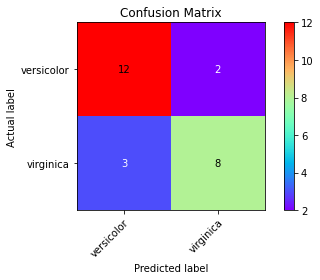

In [89]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,):
    """
    This function prints and plots the confusion matrix..
    """
    cmap=plt.cm.rainbow
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    print('Confusion matrix')
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='Actual label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # create text inside
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="black" if cm[i, j] > thresh else "white")
    fig.tight_layout()
    return ax


plot_confusion_matrix(y_test, y_pred_neigh_1, classes=iris.target_names)
plt.show()

* Briefly research and summarize in writing the meaning of the four types of index values.<br>
Overview:<br>
The confusion matrix is ​​a matrix of the number of predicted values ​​on the x-axis with respect to the correct value on the y-axis.<br>
With the value 12 in the upper left, the number of versicolors that are correct and the predicted value is versicolor is 12.<br>
With the value 2 on the upper right is the number that was predicted to be virginica even though the correct answer is versicolor.


Assume we are predicting the value to be True or False
* Accuary is the percentage of all correct answers <br>
* Precision is predicted to be True, and the percentage that was really True<br>
* Recall (reproducibility) is the percentage that the correct answer is True and predicted to be False<br>
* F1 is the harmonic mean of and Recall  and Precision<br>
The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. <br>

For example:

Suppose a computer program for recognizing dogs (the relevant element) in photographs identifies eight dogs in a picture containing ten cats and twelve dogs, and of the eight it identifies as dogs, five actually are dogs (true positives), while the other three are cats (false positives). Seven dogs were missed (false negatives), and seven cats were correctly excluded (true negatives). The program's precision is then 5/8 (true positives / all positives) while its recall is 5/12 (true positives / relevant elements).


# [Problem 7] Visualization

In [91]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.rcParams['font.size'] = 12
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

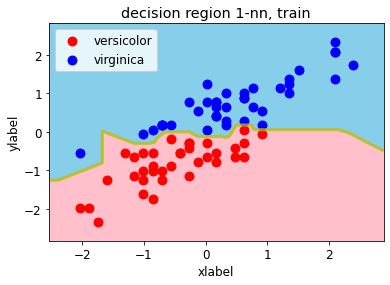

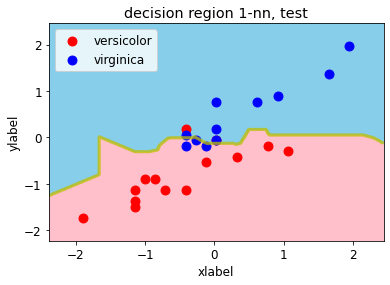

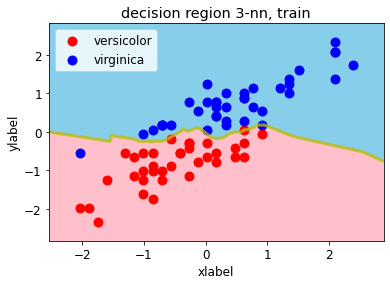

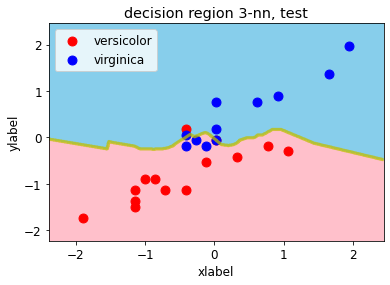

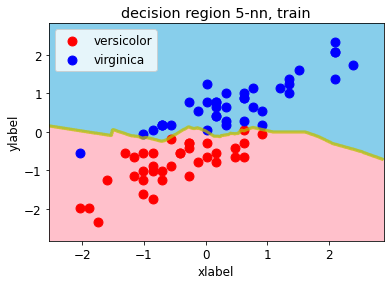

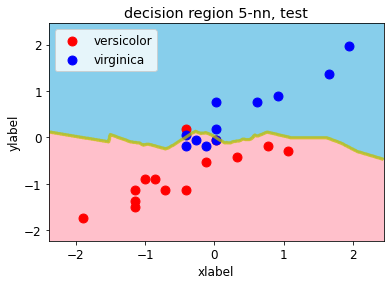

In [92]:
models = [neigh_1, neigh_3, neigh_5]
model_names = ['1-nn', '3-nn', '5-nn']

for model, model_names in zip(models, model_names):
    decision_region(X_train_transformed, y_train, model, title='decision region {}, {}'.format(model_names, 'train'))
    decision_region(X_test_transformed, y_test, model, title='decision region {}, {}'.format(model_names, 'test'))